<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Final Exam - Take Home Project



---
#### Guidelines 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **20%** of your final exam score.
- You need to be part of a group with **3** students.
- The **take home project** is due on **DEC 9th 2019** before class/exam (if you are taking the in-class exam before the rest of the class, you **need to push your take home project** before you commence with the in-class exam) = **NO EXCUSES !!**
- The team leader will receive an email where he/she will uploading the team members names and a link to the notebook in GitHub.

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [93]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [94]:
iowa_path = '/Users/Joseph/Desktop/ECON611-oonly2645/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

In [95]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [96]:
iowa1 =  iowa.copy()

In [97]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [98]:
iowa1.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [245]:
iowa.shape

(270955, 18)


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [99]:
iowa1.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

### 3.2 Clean the columns

In [100]:
iowa1[['Category','Category Name','Item Description']]

,Category,Category Name,Item Description
0,1051100.0,APRICOT BRANDIES,Mr. Boston Apricot Brandy
1,1011100.0,BLENDED WHISKIES,Tin Cup
2,1011200.0,STRAIGHT BOURBON WHISKIES,Jim Beam
3,1071100.0,AMERICAN COCKTAILS,1800 Ultimate Margarita
4,1031080.0,VODKA 80 PROOF,Five O'clock Vodka
5,1041100.0,AMERICAN DRY GINS,New Amsterdam Gin
6,1051010.0,AMERICAN GRAPE BRANDIES,Korbel Brandy
7,1012100.0,CANADIAN WHISKIES,Canadian Club Whisky
8,1032080.0,IMPORTED VODKA,Absolut Swedish Vodka 80 Prf
9,1081315.0,CINNAMON SCHNAPPS,Dekuyper Hot Damn!


In [101]:
iowa1[['Category','Category Name']].groupby(['Category Name']).count()

,Category
Category Name,
100 PROOF VODKA,3304
AMARETTO - IMPORTED,3
AMERICAN ALCOHOL,573
AMERICAN AMARETTO,1346
AMERICAN COCKTAILS,6929
AMERICAN DRY GINS,6559
AMERICAN GRAPE BRANDIES,6589
AMERICAN SLOE GINS,169
ANISETTE,35


In [107]:
cat_missing_name_list = []
cat_missing_name = iowa1[['Category','Category Name']].loc[iowa1['Category Name'].isnull()&iowa1['Category'].notnull()]
for i in cat_missing_name ['Category']:
    if i not in cat_missing_name_list:
        cat_missing_name_list.append(i)


In [536]:
print(cat_missing_name_list)
print(type(cat_missing_name_list[0]))

[1022200.0, 1052100.0, 1082100.0, 1032100.0, 1091100.0, 1062500.0, 1091300.0, 1082200.0, 1062400.0, 1011700.0, 1092100.0]
<class 'float'>


In [564]:
iowa1['Category Name'] = np.where(iowa1['Category'] == 1022200.0, 'MEXICAN TEQUILA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1052100.0, 'HENNESSY WHISKIES',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1082100.0, 'FLAVORED VODKA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1032100.0, 'RUSSIAN VODKA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1091100.0, 'MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1062500.0 , 'FRUITY RUM',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1091300.0, 'FLAVORED MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1082200.0, 'FLAVORED WHISKIES',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1062400.0, 'SPICED RUM',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1011700.0, 'AMERICAN MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1092100.0, 'FLAVORED LIQUEUR',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'].isnull(), 'GIFT SETS', iowa1['Category Name'])
iowa1['Category'] = np.where(iowa1['Category Name'] == 'GIFT SETS', 1801800.0 , iowa1['Category'])


In [565]:
iowa1.loc[iowa1['Category Name'] == 'GIFT SETS']

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit,Profit/Gallon
6744,11/16/2015,4857,WEST BURLINGTON,52655,29.0,Des Moines,1801800.0,GIFT SETS,85,333,Jack Daniels TN Honey & Jack Daniels TN Fire 7...,1500,15.07,22.61,1,22.61,1.50,0.40,7.54,18.850000
11241,10/27/2015,3625,ANKENY,50021,77.0,Polk,1801800.0,GIFT SETS,259,59100,Evan Williams Egg Nog,750,4.46,6.69,10,66.90,7.50,1.98,22.30,11.262626
16205,10/12/2015,2670,CORALVILLE,52241,52.0,Johnson,1801800.0,GIFT SETS,35,1488,Grey Goose w/2 Martini Glasses,750,15.31,22.97,12,275.64,9.00,2.38,91.92,38.621849
17648,11/19/2015,2567,DAVENPORT,52806,82.0,Scott,1801800.0,GIFT SETS,130,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,150,6.40,9.60,6,57.60,0.90,0.24,19.20,80.000000
18996,11/19/2015,3664,NORTHWOOD,50459,98.0,Worth,1801800.0,GIFT SETS,85,333,Jack Daniels TN Honey & Jack Daniels TN Fire 7...,1500,15.07,22.61,4,90.44,6.00,1.59,30.16,18.968553
24190,10/20/2015,5097,CEDAR RAPIDS,52402,57.0,Linn,1801800.0,GIFT SETS,259,59100,Evan Williams Egg Nog,750,4.46,6.69,12,80.28,9.00,2.38,26.76,11.243697
29798,10/12/2015,2643,WATERLOO,50701,7.0,Black Hawk,1801800.0,GIFT SETS,35,1475,Bombay Sapphire w/Glass,750,13.50,20.25,5,101.25,3.75,0.99,33.75,34.090909
34063,10/13/2015,2666,ANKENY,50023,77.0,Polk,1801800.0,GIFT SETS,259,59100,Evan Williams Egg Nog,750,4.46,6.69,2,13.38,1.50,0.40,4.46,11.150000
35894,10/14/2015,5067,STORM LAKE,50588,11.0,Buena Vista,1801800.0,GIFT SETS,35,1488,Grey Goose w/2 Martini Glasses,750,15.31,22.97,6,137.82,4.50,1.19,45.96,38.621849
37974,10/14/2015,3735,OSKALOOSA,52577,10.0,Buchanan,1801800.0,GIFT SETS,35,1488,Grey Goose w/2 Martini Glasses,750,15.31,22.97,6,137.82,4.50,1.19,45.96,38.621849


In [571]:
iowa1.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                    0
Category Name               0
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
Profit                      0
Profit/Gallon               0
dtype: int64

In [140]:
for i in cat_missing_name_list:
    if i in cat_missing_name_list:
        z = iowa1[['Category','Item Description']].loc[iowa1['Category'] == i]
    print (z)

         Category              Item Description
896     1022200.0  Herradura Gold Reposado 6pak
15970   1022200.0  Herradura Gold Reposado 6pak
17213   1022200.0                Exotico Blanco
18404   1022200.0  Herradura Gold Reposado 6pak
21707   1022200.0                   1800 Silver
26337   1022200.0                Exotico Blanco
26918   1022200.0       Tres Generaciones Anejo
28882   1022200.0                Exotico Blanco
29890   1022200.0  Herradura Gold Reposado 6pak
39441   1022200.0         Olmeca Altos Reposado
41314   1022200.0              Exotico Reposado
41568   1022200.0  Herradura Gold Reposado 6pak
42882   1022200.0  Herradura Gold Reposado 6pak
45252   1022200.0      Sauza Cien Anos Reposado
54289   1022200.0      Sauza Cien Anos Reposado
54577   1022200.0         Olmeca Altos Reposado
61087   1022200.0  Herradura Gold Reposado 6pak
72380   1022200.0  Herradura Gold Reposado 6pak
73530   1022200.0  Herradura Gold Reposado 6pak
83521   1022200.0  Herradura Gold Reposa

In [271]:
a = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1011700.0'].count()
b = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1022200.0'].count()
c = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1032100.0'].count()
d = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1052100.0'].count()
e = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1062400.0'].count()
f = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1062500.0'].count()
g = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1082100.0'].count()
h = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1091100.0'].count()
i = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1091300.0'].count()
j = iowa1[['Category','Category Name']].loc[iowa1['Category'] == '1092100.0'].count()
k = iowa1[['Category','Category Name']].loc[iowa1['Category'] == 'nan'].count()

TypeError: invalid type comparison


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [262]:
iowa3 = iowa1.copy()
iowa3.shape
#iowa_nonull.dtypes

(270955, 20)

In [263]:
iowa3.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
Profit                      0
Profit/Gallon               0
dtype: int64

In [264]:
iowa_nonull = iowa3.dropna()
iowa_nonull.shape


(269258, 20)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [273]:
iowa_datesort = iowa_nonull.copy()
iowa_datesort.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
Profit                   float64
Profit/Gallon            float64
dtype: object

In [291]:
pd.to_datetime(iowa_datesort['Date'])
iowa_datesort['Month'] = iowa_datesort['Date'].dt.month
iowa_datesort.shape
iowa_datesort.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit,Profit/Gallon,Month,Year
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.0,2.38,27.00,11.344538,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,13.75,20.63,2,41.26,1.5,0.40,13.76,34.400000,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,12.59,18.89,24,453.36,24.0,6.34,151.20,23.848580,2,2016


In [318]:
z = iowa_datesort[(iowa_datesort['Year'] == 2015) & (iowa_datesort['Month'] == 12)]
z.sort_values('Store Number')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit,Profit/Gallon,Month,Year
109536,2015-12-10,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69656,...,8.67,13.01,12,156.12,9.00,2.38,52.08,21.882353,12,2015
193177,2015-12-30,2106,CEDAR FALLS,50613,7.0,Black Hawk,1062310.0,SPICED RUM,260,43336,...,9.00,13.50,24,324.00,18.00,4.76,108.00,22.689076,12,2015
170334,2015-12-10,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081700.0,DISTILLED SPIRITS SPECIALTY,346,86747,...,11.00,16.50,3,49.50,2.25,0.59,16.50,27.966102,12,2015
30909,2015-12-23,2106,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,434,34546,...,7.00,10.50,24,252.00,18.00,4.76,84.00,17.647059,12,2015
267521,2015-12-10,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011100.0,BLENDED WHISKIES,297,23827,...,4.40,6.60,24,158.40,24.00,6.34,52.80,8.328076,12,2015
30502,2015-12-17,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081240.0,GREEN CREME DE MENTHE,434,79026,...,4.50,6.75,12,81.00,9.00,2.38,27.00,11.344538,12,2015
40031,2015-12-23,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69656,...,8.67,13.01,12,156.12,9.00,2.38,52.08,21.882353,12,2015
143642,2015-12-23,2106,CEDAR FALLS,50613,7.0,Black Hawk,1062300.0,FLAVORED RUM,35,43137,...,9.50,14.25,12,171.00,12.00,3.17,57.00,17.981073,12,2015
229762,2015-12-03,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19226,...,20.99,31.49,6,188.94,4.50,1.19,63.00,52.941176,12,2015
53073,2015-12-10,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012210.0,SINGLE MALT SCOTCH,420,5133,...,22.99,34.49,1,34.49,0.75,0.20,11.50,57.500000,12,2015


In [342]:
ç
y.sort_values('Store Number')

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit,Profit/Gallon,Month,Year
130957,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081317.0,GRAPE SCHNAPPS,65,82637,...,7.62,11.43,12,137.16,12.00,3.17,45.72,14.422713,1,2015
22526,2015-01-15,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081400.0,TRIPLE SEC,421,86637,...,3.01,4.52,12,54.24,12.00,3.17,18.12,5.716088,1,2015
223428,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,55,29287,...,3.92,5.88,12,70.56,12.00,3.17,23.52,7.419558,1,2015
77078,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1051010.0,AMERICAN GRAPE BRANDIES,259,902929,...,6.63,9.95,60,597.00,45.00,11.89,199.20,16.753574,1,2015
105659,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,434,34546,...,7.86,11.79,12,141.48,9.00,2.38,47.16,19.815126,1,2015
36665,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370,32231,...,3.30,4.95,1,4.95,0.50,0.13,1.65,12.692308,1,2015
47659,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,410,88296,...,27.00,40.50,12,486.00,9.00,2.38,162.00,68.067227,1,2015
13533,2015-01-15,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012300.0,IRISH WHISKIES,240,15940,...,14.38,21.57,12,258.84,9.00,2.38,86.28,36.252101,1,2015
172418,2015-01-29,2106,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,380,31719,...,4.38,6.57,12,78.84,12.00,3.17,26.28,8.290221,1,2015
142550,2015-01-29,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,85526,...,5.25,7.88,12,94.56,9.00,2.38,31.56,13.260504,1,2015


In [349]:
sn1 = []
for i in z['Store Number']:
    if i not in sn1:
        sn1.append(i)
sn2 = []
for j in y['Store Number']:
    if j not in sn2:
        sn2.append(j)

print(len(sn1))
print(len(sn2))
list_store_number = []
for i in sn1:
    if i in sn2:
        list_store_number.append(i)
print(len(list_store_number))

1223
1147
1046


In [341]:
x = z.merge = (y, y['Store Number'],'left', 'Store Number')


(             Date  Store Number               City Zip Code  County Number  \
12     2015-01-22          3858          DAVENPORT    52806           82.0   
20     2015-01-16          2590       CEDAR RAPIDS    52402           57.0   
21     2015-01-13          3942             TOLEDO    52342           86.0   
29     2015-01-14          2545          IOWA CITY    52245           52.0   
31     2015-01-12          2555             KEOKUK    52632           56.0   
32     2015-01-16          2549          INDIANOLA    50125           91.0   
33     2015-01-13          2644         FORT DODGE    50501           94.0   
49     2015-01-26          3612          MAQUOKETA    52060           49.0   
52     2015-01-28          2623         SIOUX CITY    51104           97.0   
71     2015-01-13          4167            DUBUQUE    52001           31.0   
102    2015-01-20          2665             WAUKEE    50263           25.0   
108    2015-01-15          2648    WEST DES MOINES    50265    

In [568]:
dy1 = iowa_datesort[['Store Number','Month']].loc[(iowa_datesort['Year']== 2015)]
dy2 = dy1.groupby(['Store Number', 'Month']).count().reset_index()


In [569]:
dy3 = dy2.groupby(['Store Number']).count().reset_index()
dy3

,Store Number,Month
0,2106,12
1,2113,12
2,2130,12
3,2152,12
4,2178,12
5,2190,12
6,2191,12
7,2200,12
8,2205,12
9,2228,12


In [570]:
dy4 = dy3[dy3['Month']==12]


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [148]:
symb_corrupted = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']
for i in symb_corrupted:
    iowa1[i] = iowa1[i].apply(str).str.replace('$', '').astype(float)


In [153]:
total_sale_bystore = iowa1[['Store Number','Sale (Dollars)']].groupby(['Store Number']).sum()
total_sale_bystore


,Sale (Dollars)
Store Number,
2106,176849.97
2113,11376.12
2130,139727.54
2152,9097.51
2178,29912.68
2190,156204.75
2191,172431.69
2200,26986.42
2205,24681.39


### 5.2 Calculate the profit each store is making in 2015.


In [164]:
iowa1['Profit'] = (iowa1['State Bottle Retail'] - iowa1['State Bottle Cost']) * iowa1['Bottles Sold']

In [166]:
total_profit_bystore = iowa1[['Store Number','Profit']].groupby(['Store Number']).sum()
total_profit_bystore

,Profit
Store Number,
2106,59027.76
2113,3802.53
2130,46613.49
2152,3048.97
2178,10034.46
2190,52127.01
2191,57528.92
2200,9045.49
2205,8244.13


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [173]:
iowa1['Profit/Gallon']  = iowa1['Profit']/iowa1['Volume Sold (Gallons)']
profit_perG_bycounty = iowa1[['County','Profit/Gallon']].groupby('County').mean()
profit_perG_bycounty

,Profit/Gallon
County,
Adair,19.782364
Adams,21.574472
Allamakee,19.577486
Appanoose,20.629805
Audubon,17.948797
Benton,19.011035
Black Hawk,23.597976
Boone,20.618230
Bremer,21.054077


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [193]:
iowa2 = iowa1[['Store Number','Volume Sold (Gallons)','Profit']].groupby('Store Number').sum()
iowa2['Profit/Gallon_bystoresize'] = iowa2['Profit']/iowa2['Volume Sold (Gallons)']
iowa2.sort_values(['Volume Sold (Gallons)'])

,Volume Sold (Gallons),Profit,Profit/Gallon_bystoresize
Store Number,,,
5053,0.20,22.50,112.500000
5218,0.40,6.40,16.000000
4567,0.79,15.06,19.063291
4939,1.15,17.81,15.486957
5195,1.34,30.85,23.022388
5056,1.81,58.24,32.176796
5192,2.18,41.20,18.899083
5201,2.28,96.65,42.390351
5193,2.37,46.53,19.632911


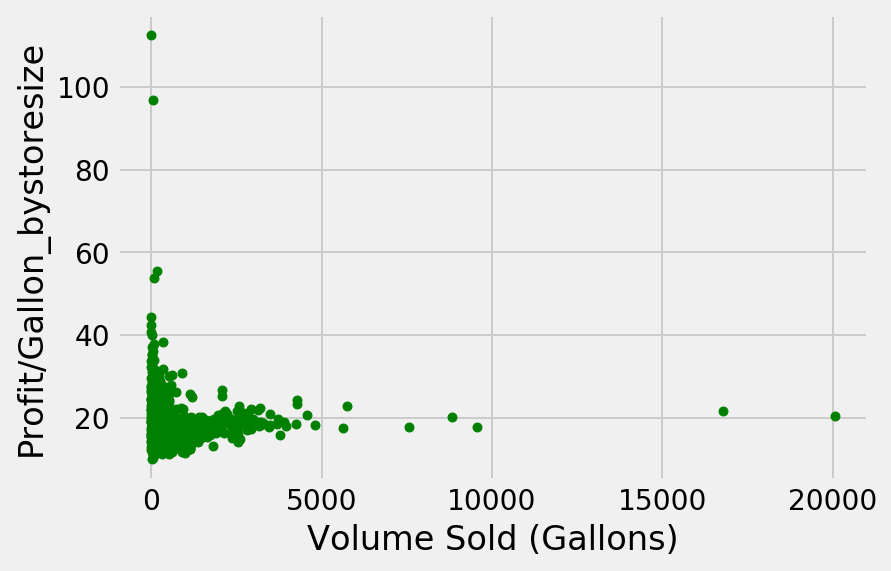

In [242]:
iowa2.plot(kind = 'scatter', x = 'Volume Sold (Gallons)', y = 'Profit/Gallon_bystoresize', color = 'green')
plt.show()

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [195]:
iowa3 = iowa1.copy()

In [238]:
iowa3['Category Name'] = iowa1['Category Name'].astype(str)

In [243]:
iowa3=iowa3['Category Name'].unique()
Cat2={}
for x in iowa3:
    if x.find('WHISKIES')!=-1:
        Cat2[x] = 'Whisky'
    elif x.find('VODKA')!=-1:
        Cat2[x] = 'Vodka'
    elif x.find('GINS')!=-1:
        Cat2[x] = 'Gin'
    elif x.find('TEQUILA')!=-1:
        Cat2[x] = 'Tequila'
    elif x.find('BRANDIES')!=-1:
        Cat2[x] = 'Brandies'
    elif x.find('SCHNAPPS')!=-1:
        Cat2[x] = 'Schnapps'
    elif x.find('RUM')!=-1:
        Cat2[x] = 'Rum'
    elif x.find('COCKTAILS')!=-1:
        Cat2[x] = 'Cocktails'
    else:
        Cat2[x] = 'Misc'
print(Cat2)
iowa3['Liquor'] = iowa3['Category Name'].map(Cat2)
iowa3[['Liquor']].groupby(['Liquor']).count()

{'APRICOT BRANDIES': 'Brandies', 'BLENDED WHISKIES': 'Whisky', 'STRAIGHT BOURBON WHISKIES': 'Whisky', 'AMERICAN COCKTAILS': 'Cocktails', 'VODKA 80 PROOF': 'Vodka', 'AMERICAN DRY GINS': 'Gin', 'AMERICAN GRAPE BRANDIES': 'Brandies', 'CANADIAN WHISKIES': 'Whisky', 'IMPORTED VODKA': 'Vodka', 'CINNAMON SCHNAPPS': 'Schnapps', 'SINGLE BARREL BOURBON WHISKIES': 'Whisky', 'PEPPERMINT SCHNAPPS': 'Schnapps', 'VODKA FLAVORED': 'Vodka', '100 PROOF VODKA': 'Vodka', 'DISTILLED SPIRITS SPECIALTY': 'Misc', 'TEQUILA': 'Tequila', 'TENNESSEE WHISKIES': 'Whisky', 'WHISKEY LIQUEUR': 'Misc', 'MISC. AMERICAN CORDIALS & LIQUEURS': 'Misc', 'APPLE SCHNAPPS': 'Schnapps', 'CHERRY BRANDIES': 'Brandies', 'MISC. IMPORTED CORDIALS & LIQUEURS': 'Misc', 'IMPORTED DRY GINS': 'Gin', 'WATERMELON SCHNAPPS': 'Schnapps', 'BLACKBERRY BRANDIES': 'Brandies', 'SINGLE MALT SCOTCH': 'Misc', 'PUERTO RICO & VIRGIN ISLANDS RUM': 'Rum', 'SPICED RUM': 'Rum', 'CREAM LIQUEURS': 'Misc', 'SCOTCH WHISKIES': 'Whisky', 'IMPORTED VODKA - MISC':

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [244]:
iowa3 = iowa3[['Liquor','Item Description','Sale (Dollars)','Profit','Volume Sold (Gallons)]'].groupby(['Liquor','Item Description']).sum().reset_index()
iowa3[P'rofit per Gallon'] = iowa3['Profit'] / iowa3['Volume Sold (Gallons)']
print(iowa3.sort_values(by=['Liquor','Profit per Gallon'], ascending = False).loc[iowa3['Liquor']=='Tequila'].head(10))
print(iowa3.sort_values(by=['Liquor','Profit per Gallon'], ascending = False).loc[iowa3['Liquor']=='Tequila'].tail(10))
print(iowa3.sort_values(by=['Liquor','Profit per Gallon'], ascending = False).loc[iowa3['Liquor']=='Brandies'].head(3))
print(iowa3.sort_values(by=['Liquor','Profit per Gallon'], ascending = False).loc[iowa3['Liquor']=='Brandies'].tail(3))

SyntaxError: invalid syntax (<ipython-input-244-9d43f611106c>, line 2)

In [239]:
import re
new_cat = [('WHISKEIES','Whisky'),('VODKA','Vodka'),('GIN','gin'),('TEQUILA','Tequila'),('BRANDIES','Brandies'),('SCHNAPPS','Schanpps'),('RUM','Rum'),('COCKTAILS','Cocktails')]
for old, new in new_cat:
    New_Category_Name = re.sub(old, new, iowa3['Category Name'])


TypeError: expected string or bytes-like object

### 5.6 Do relationships exist between the broader liquor type and profit?


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [463]:
store_2015_123 = iowa_datesort[iowa_datesort['Year'] == 2015].loc[iowa_datesort['Month'] < 4].groupby('Store Number').sum().reset_index()
profit_2015 = store_2015_123[['Store Number','Profit','Bottles Sold','Sale (Dollars)'] ]                                        
profit_2015.shape                    
                                                                 

(1261, 4)

<bound method NDFrame.head of       Store Number  County Number     Category  Vendor Number  Item Number  \
0             2106          903.0  135781951.0          36427      9581961   
1             2113         3948.0   43582910.0          11030      1875932   
2             2130          609.0   91579237.0          22567      4917259   
3             2152          544.0   33222330.0           7734      1196248   
4             2178          144.0   50160670.0          11224      2126804   
5             2190        26719.0  360209117.0          87397     15214788   
6             2191         8456.0  157558712.0          38978      7999904   
7             2200         6804.0   87576155.0          20251      3985277   
8             2205         5110.0   72547570.0          18596      2828767   
9             2228         3660.0   62546060.0          13395      2858289   
10            2233         1290.0   44700780.0          11101      1693860   
11            2238          539.0 

In [465]:
store_2016_123 = iowa_datesort[iowa_datesort['Year'] == 2016].loc[iowa_datesort['Month'] < 4].groupby('Store Number').sum().reset_index()
profit_2016 = store_2016_123[['Store Number','Profit','Bottles Sold','Sale (Dollars)']]  
profit_2016.shape

(1280, 4)

In [466]:
profit_2015.head(10)

,Store Number,Profit,Bottles Sold,Sale (Dollars)
0,2106,13108.37,2705,39287.29
1,2113,944.72,196,2833.25
2,2130,8108.68,1533,24272.57
3,2152,668.60,154,2003.46
4,2178,1961.28,490,5856.41
5,2190,9828.30,2557,29452.92
6,2191,9723.40,1868,29085.57
7,2200,1641.80,338,4900.43
8,2205,2138.97,466,6407.74
9,2228,1736.43,372,5193.97


In [467]:
profit_2016.head(10)

,Store Number,Profit,Bottles Sold,Sale (Dollars)
0,2106,10174.68,2218,30478.75
1,2113,693.49,159,2065.90
2,2130,9288.29,1726,27856.11
3,2152,304.08,97,904.66
4,2178,1868.76,480,5588.50
5,2190,10604.77,2425,31803.06
6,2191,15784.53,2610,47338.20
7,2200,1392.02,262,4174.87
8,2228,1033.74,229,3086.38
9,2233,2175.73,478,6522.65


In [468]:
combine_profit = pd.merge(profit_2015,profit_2016,on = 'Store Number', how = 'left')
combine_profit.head(10)


,Store Number,Profit_x,Bottles Sold_x,Sale (Dollars)_x,Profit_y,Bottles Sold_y,Sale (Dollars)_y
0,2106,13108.37,2705,39287.29,10174.68,2218.0,30478.75
1,2113,944.72,196,2833.25,693.49,159.0,2065.90
2,2130,8108.68,1533,24272.57,9288.29,1726.0,27856.11
3,2152,668.60,154,2003.46,304.08,97.0,904.66
4,2178,1961.28,490,5856.41,1868.76,480.0,5588.50
5,2190,9828.30,2557,29452.92,10604.77,2425.0,31803.06
6,2191,9723.40,1868,29085.57,15784.53,2610.0,47338.20
7,2200,1641.80,338,4900.43,1392.02,262.0,4174.87
8,2205,2138.97,466,6407.74,NaN,NaN,NaN
9,2228,1736.43,372,5193.97,1033.74,229.0,3086.38


In [470]:
combine_profit_clean = combine_profit.loc[combine_profit['Profit_y'].notnull()]
combine_profit.shape

(1261, 7)

In [472]:
combine_profit_clean.shape

(1176, 7)

In [476]:
combine_profit_clean['Total Bottles Sold'] = combine_profit_clean['Bottles Sold_x'] + combine_profit_clean['Bottles Sold_y']
combine_profit_clean['Sales Growth%'] = ((combine_profit_clean['Sale (Dollars)_y']-combine_profit_clean['Sale (Dollars)_x'])/combine_profit_clean['Sale (Dollars)_x'])*100
combine_profit_clean['Profit Growth%'] = ((combine_profit_clean['Profit_y'] - combine_profit_clean['Profit_x'])/combine_profit_clean['Profit_x'])*100


/Users/Joseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Joseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Joseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [491]:
growth_table = combine_profit_clean[['Store Number','Total Bottles Sold','Sales Growth%','Profit Growth%']]
growth_table.sort_values(by = 'Sales Growth%', ascending = False).head(20).reset_index()

,index,Store Number,Total Bottles Sold,Sales Growth%,Profit Growth%
0,1170,5021,97.0,8329.794826,8326.203209
1,647,4401,88.0,1851.320201,1847.616060
2,1246,5103,91.0,1614.663237,1615.287518
3,1071,4896,97.0,1369.510978,1415.019960
4,1257,5128,673.0,1334.897275,1339.734725
5,987,4793,140.0,1267.219956,1266.590844
6,514,4191,481.0,1236.995812,1229.609996
7,977,4782,132.0,1225.776173,1232.683983
8,825,4607,90.0,1116.687898,1125.190840
9,1169,5020,174.0,985.806452,981.686747


In [495]:
growth_table['Total Bottles Sold'].mean()

781.0841836734694

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [ ]:
#large amount og liquor defined as > 1000 bottle sold
#Growth% > 50%

In [490]:
growth_table_qualify = growth_table.loc[growth_table['Total Bottles Sold'] > 1000]

In [506]:
z = growth_table_qualify.sort_values(by ='Sales Growth%', ascending = False).head(30)
z

,Store Number,Total Bottles Sold,Sales Growth%,Profit Growth%
303,3772,1459.0,734.619830,734.528881
1248,5105,1290.0,452.764938,448.461268
446,4092,1431.0,344.504189,356.387530
207,3477,3342.0,229.434283,229.550709
558,4269,1392.0,202.336260,210.180887
94,2595,2853.0,186.008630,194.404355
550,4255,1592.0,174.293911,181.235420
390,3963,1278.0,122.924886,122.919516
112,2618,1068.0,119.929917,118.956199
1128,4969,2087.0,115.187586,114.654834


In [507]:
qualify_store_number = []
for i in z['Store Number']:
    if i not in qualify_store_number:
        qualify_store_number.append(i)
print(qualify_store_number)

[3772, 5105, 4092, 3477, 4269, 2595, 4255, 3963, 2618, 4969, 4588, 2562, 3584, 2548, 2523, 5102, 3354, 4879, 4900, 3670, 2622, 3663, 3494, 2665, 2191, 4073, 2585, 2571, 5077, 3728]


In [521]:
location_select = iowa_datesort[iowa_datesort['Store Number'].isin(qualify_store_number)]

In [531]:
location_select[['Store Number','County','City']].groupby(['City','County']).count()

,,Store Number
City,County,
ALGONA,Kossuth,664
ALTOONA,Polk,877
CEDAR RAPIDS,Linn,363
CENTERVILLE,Appanoose,478
CLEAR LAKE,Cerro Gordo,578
CORALVILLE,Johnson,377
COUNCIL BLUFFS,Pottawattamie,1427
DAVENPORT,Scott,392
DENISON,Crawford,639


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?